<a href="https://colab.research.google.com/github/Juangabuk/Bangkit-Capstone-Project_PimpleMe-/blob/main/PimpscanREALFinale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/CAPSTONE/Datasets
!ls


/content/gdrive/MyDrive/CAPSTONE/Datasets
 047c9c9ca40f83c2cafe387c6bb65f4c.png   levle3_133.jpg	  test
'levle3_133 (1).jpg'		        PimpleMe.h5	  train
'levle3_133 (2).jpg'		        PimpleMe.tflite


In [4]:
import os
Mild_dir = os.path.join('train/Mild')
Moderate_dir = os.path.join('train/Moderate')
Severe_Moderate_dir = os.path.join('train/Severe Moderate')
Normal_dir = os.path.join('train/Normal')

print('total training Mild images:', len(os.listdir(Mild_dir)))
print('total training Moderate images:', len(os.listdir(Moderate_dir)))
print('total training Severe Moderate images:', len(os.listdir(Severe_Moderate_dir)))
print('total training Normal images:', len(os.listdir(Normal_dir)))

total training Mild images: 387
total training Moderate images: 473
total training Severe Moderate images: 139
total training Normal images: 81


In [5]:
batch_size = 32
img_height = 180
img_width = 180
TRAINING_DIR = "train/"
VALIDATION_DIR = "test/"

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  TRAINING_DIR,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  VALIDATION_DIR,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1072 files belonging to 4 classes.
Found 298 files belonging to 4 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)


['Mild', 'Moderate', 'Normal', 'Severe Moderate']


# Image Augmentation
Do some random rotation and zoom as well.

In [8]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

 # Create CNN Architecture
 3 main Layer with 1 additional hidden layer
 
 Using "same" padding.


In [9]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu', padding='same'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu', padding='same'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu', padding='same'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs= 200
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/200
34/34 [==============================] - 194s 5s/step - loss: 1.0692 - accuracy: 0.4701 - val_loss: 1.0186 - val_accuracy: 0.5235
Epoch 2/200
34/34 [==============================] - 78s 2s/step - loss: 0.9746 - accuracy: 0.4851 - val_loss: 0.9484 - val_accuracy: 0.5101
Epoch 3/200
34/34 [==============================] - 80s 2s/step - loss: 0.9603 - accuracy: 0.4823 - val_loss: 0.9899 - val_accuracy: 0.5336
Epoch 4/200
34/34 [==============================] - 79s 2s/step - loss: 0.9378 - accuracy: 0.4981 - val_loss: 0.9731 - val_accuracy: 0.5168
Epoch 5/200
34/34 [==============================] - 80s 2s/step - loss: 0.9158 - accuracy: 0.5028 - val_loss: 1.0591 - val_accuracy: 0.4195
Epoch 6/200
34/34 [==============================] - 78s 2s/step - loss: 0.9252 - accuracy: 0.5037 - val_loss: 1.0355 - val_accuracy: 0.5403
Epoch 7/200
34/34 [==============================] - 77s 2s/step - loss: 0.9232 - accuracy: 0.5187 - val_loss: 1.0378 - val_accuracy: 0.5000
Epoch 8/200


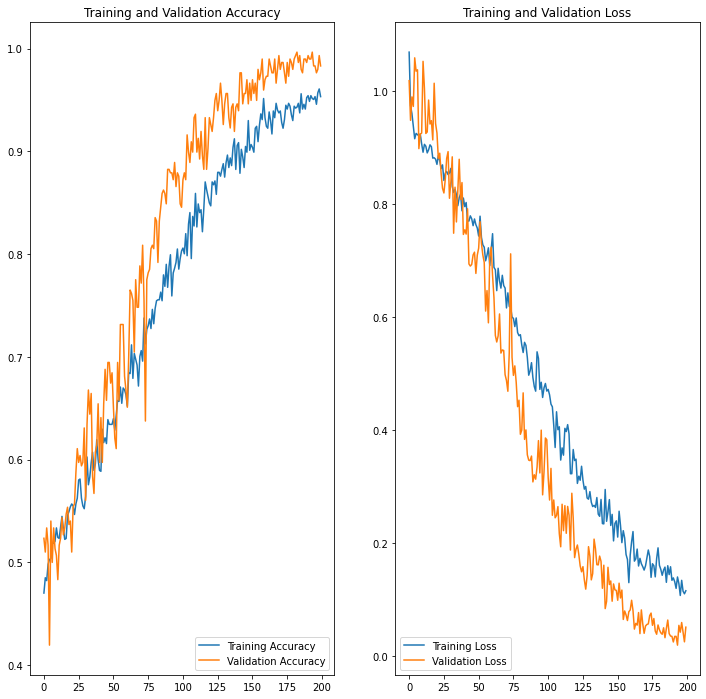

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.

model.save('PimpleMe.h5')

In [13]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
new_model= tf.keras.models.load_model(filepath="PimpleMe.h5")


In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.preprocessing.image.load_img(
      path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "The condition of the face in the picture shows {} condition with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
 

Saving botox-men-2-768x720.jpg to botox-men-2-768x720.jpg
The condition of the face in the picture shows Normal condition with a 100.00 percent confidence.


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('PimpleMe.tflite', 'wb') as f:
  f.write(tflite_model)